In [1]:
import pandas as pd

In [2]:
data = {
    "employee_id": [1, 2, 3, 4, 5],
    "name": ["Alice", "Bob", "John", "Mary", "Leo"],
    "department": ["HR", "IT", "IT", "Sales", "Sales"],
    "salary": [50000, 70000, 80000, 60000, 55000],
    "performance_score": [78, 85, 92, 88, 70]
}

hr = pd.DataFrame(data)
hr

,employee_id,name,department,salary,performance_score
0,1,Alice,HR,50000,78
1,2,Bob,IT,70000,85
2,3,John,IT,80000,92
3,4,Mary,Sales,60000,88
4,5,Leo,Sales,55000,70


In [3]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   employee_id        5 non-null      int64 
 1   name               5 non-null      object
 2   department         5 non-null      object
 3   salary             5 non-null      int64 
 4   performance_score  5 non-null      int64 
dtypes: int64(3), object(2)
memory usage: 332.0+ bytes


In [25]:
# best performing staff

hr.sort_values('performance_score', ascending = False)

,employee_id,name,department,salary,performance_score,bonus,p_label
2,3,John,IT,80000,92,add 15% to salary,high
3,4,Mary,Sales,60000,88,add 15% to salary,high
1,2,Bob,IT,70000,85,add 15% to salary,high
0,1,Alice,HR,50000,78,no bonus,medium
4,5,Leo,Sales,55000,70,no bonus,low


In [12]:
# to check the department that earns the highest in the company

salary_dept = hr.groupby('department')['salary'].sum().sort_values(ascending = False)
salary_dept

department
IT       150000
Sales    115000
HR        50000
Name: salary, dtype: int64

In [15]:
# to check the department with the highest performance score

performance_dept = hr.groupby('department')['performance_score'].sum().sort_values(ascending = False)
performance_dept

department
IT       177
Sales    158
HR        78
Name: performance_score, dtype: int64

In [21]:
# to check the average salary across each departments

avg_salary = hr.groupby('department')['salary'].mean().sort_values(ascending = False)
avg_salary

department
IT       75000.0
Sales    57500.0
HR       50000.0
Name: salary, dtype: float64

In [23]:
# to add a performance label

hr['p_label'] = hr['performance_score'].map(lambda performance_score: 'high' if performance_score >= 85 else
                                                                        'medium' if performance_score >= 75 else
                                                                           'low' 
                                                                               )
hr

,employee_id,name,department,salary,performance_score,bonus,p_label
0,1,Alice,HR,50000,78,no bonus,medium
1,2,Bob,IT,70000,85,add 15% to salary,high
2,3,John,IT,80000,92,add 15% to salary,high
3,4,Mary,Sales,60000,88,add 15% to salary,high
4,5,Leo,Sales,55000,70,no bonus,low


In [17]:
# to reward high performance staffs and those not to reward

hr['bonus'] = hr['performance_score'].map(lambda performance_score : 'add 15% to salary' if performance_score >= 80 else 'no bonus' )
hr

,employee_id,name,department,salary,performance_score,bonus
0,1,Alice,HR,50000,78,no bonus
1,2,Bob,IT,70000,85,add 15% to salary
2,3,John,IT,80000,92,add 15% to salary
3,4,Mary,Sales,60000,88,add 15% to salary
4,5,Leo,Sales,55000,70,no bonus


<Axes: title={'center': 'average salary by department'}, xlabel='department'>

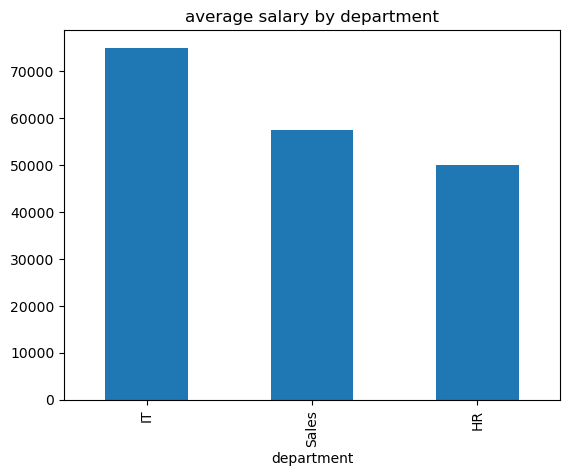

In [24]:
# simple visualization

avg_salary.plot(
kind = 'bar',
title = 'average salary by department'   
)

# key insights

- IT department has the highest average salary of 75000
- IT department has the highest performance score with total of 177
- john from the IT department is the best performing staff with a performance score of 92
- sales has the lowest average salary
- many staffs for into the medium to high performer